**Simulación de sistemas dinámicos - Circuito Serie V-R-C** 

In [ ]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, exp, symbols #para importar de una libreria una funcion especifica
from sympy import pprint, classify_ode, solve, init_printing, latex
from IPython.display import display, Image, HTML, Math
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))

display(Math(r"$$\frac{d}{dt}x(t)=F(x,t),~x(t_0)=x_0$$"))


<IPython.core.display.Math object>

In [ ]:
t = symbols('t')
tau, xt0, t0, C1,V = symbols('tau xt0 t0 C1 V')
x = Function('x')
#dx = Derivative(x,t)
dx_eq = Eq(x(t).diff(t),(V-x(t))/tau)
pprint(dx_eq)

#display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
#               "latest.js?config=default'></script>"))
#displzay(Math(pprint(dx_eq)))

d          V - x(t)
──(x(t)) = ────────
dt            τ    


In [ ]:
xt_c = Function('xt_c')
xt_c = dsolve(dx_eq, x(t))
pprint(xt_c)

           -t     
           ───    
            τ     
x(t) = C₁⋅ℯ    + V


In [ ]:
ics = {x(0):xt0}

In [ ]:
xt_ics = Function('xt_ics')
xt_ics=xt_c.subs(t,0).subs(ics)#.subs(V,1)
pprint(xt_ics)

xt₀ = C₁ + V


In [ ]:
ics_sol = solve(xt_ics)
pprint(ics_sol)

[{C₁: -V + xt₀}]


In [ ]:
xt = Function('xt')

xt=xt_c.subs(ics_sol[0])
pprint(xt)
pprint(xt.subs({xt0:8,V:1,tau:0.5}))


                       -t 
                       ───
                        τ 
x(t) = V + (-V + xt₀)⋅ℯ   
              -2.0⋅t
x(t) = 1 + 7⋅ℯ      


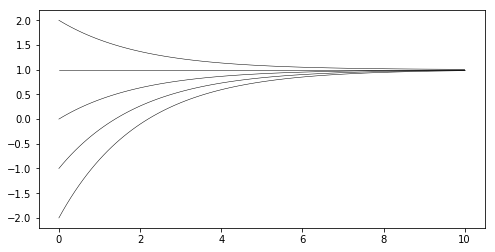

In [ ]:
from sympy import lambdify
from numpy import linspace, ndarray, ones
from matplotlib.pyplot import plot, subplots
fig, ax = subplots(figsize=(8, 4))

tplot = linspace(0,10,101)
xt_lambda = Function('xt_lambda')
xinit = linspace(-2,2,5)
for xiniti in xinit:
  xt_lambda = lambdify(t,xt.rhs.subs({xt0:xiniti,tau:2,V:1}),'numpy')
  xplot=xt_lambda(tplot)
  if (type(xplot)==type(tplot)):
    ax.plot(tplot,xt_lambda(tplot),'k',lw=0.5)
  else:
    ax.plot(tplot,ones(tplot.shape)*xplot,'k',lw=0.5)
  


In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def exponential_decay(t, y): return (1-y)/1 

In [ ]:
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8, -2, -4, -8])

In [ ]:
print(sol.t)

[ 0.          0.09897345  1.02114462  1.84168314  2.66361096  3.48553878
  4.52969194  5.77197456  7.28701008  9.19186501 10.        ]


In [ ]:
sol.y

array([[ 2.        ,  1.90576676,  1.36042844,  1.15870541,  1.06978509,
         1.03068552,  1.01081931,  1.00314331,  1.00071104,  1.00012559,
         1.00005599],
       [ 4.        ,  3.71730027,  2.08128532,  1.47611624,  1.20935526,
         1.09205656,  1.03245794,  1.00942994,  1.00213312,  1.00037678,
         1.00016797],
       [ 8.        ,  7.34036729,  3.52299908,  2.1109379 ,  1.48849561,
         1.21479865,  1.07573518,  1.02200319,  1.00497727,  1.00087915,
         1.00039193],
       [-2.        , -1.71730027, -0.08128532,  0.52388376,  0.79064474,
         0.90794344,  0.96754206,  0.99057006,  0.99786688,  0.99962322,
         0.99983203],
       [-4.        , -3.52883378, -0.8021422 ,  0.20647293,  0.65107457,
         0.84657239,  0.94590344,  0.98428344,  0.99644481,  0.99937204,
         0.99972005],
       [-8.        , -7.1519008 , -2.24385596, -0.42834872,  0.37193422,
         0.72383031,  0.90262619,  0.97171019,  0.99360065,  0.99886967,
         0.999

In [ ]:
import numpy as np
np.transpose(sol.y)


array([[ 2.        ,  4.        ,  8.        , -2.        , -4.        ,
        -8.        ],
       [ 1.90576676,  3.71730027,  7.34036729, -1.71730027, -3.52883378,
        -7.1519008 ],
       [ 1.36042844,  2.08128532,  3.52299908, -0.08128532, -0.8021422 ,
        -2.24385596],
       [ 1.15870541,  1.47611624,  2.1109379 ,  0.52388376,  0.20647293,
        -0.42834872],
       [ 1.06978509,  1.20935526,  1.48849561,  0.79064474,  0.65107457,
         0.37193422],
       [ 1.03068552,  1.09205656,  1.21479865,  0.90794344,  0.84657239,
         0.72383031],
       [ 1.01081931,  1.03245794,  1.07573518,  0.96754206,  0.94590344,
         0.90262619],
       [ 1.00314331,  1.00942994,  1.02200319,  0.99057006,  0.98428344,
         0.97171019],
       [ 1.00071104,  1.00213312,  1.00497727,  0.99786688,  0.99644481,
         0.99360065],
       [ 1.00012559,  1.00037678,  1.00087915,  0.99962322,  0.99937204,
         0.99886967],
       [ 1.00005599,  1.00016797,  1.00039193,  0.

In [ ]:
import matplotlib.pyplot as plt


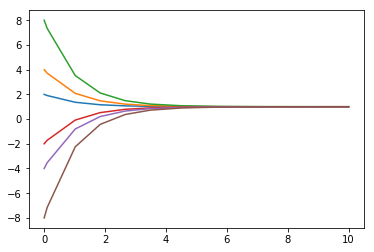

In [ ]:
plt.plot(sol.t,np.transpose(sol.y));

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


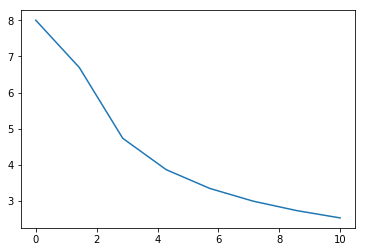

In [ ]:
et = np.linspace(0,10,8)
fet =8*np.power(et,-0.5);
fet[0]=8;
plt.plot(et,fet)


In [ ]:
#!pip install PySpice